(48, 48)


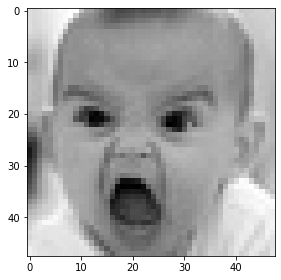

In [8]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('Training_143373.jpg')
imshow(img)
print(img.shape)

(128, 64)


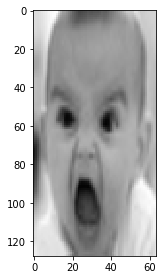

In [9]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [11]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

In [12]:
fd.shape

(3780,)

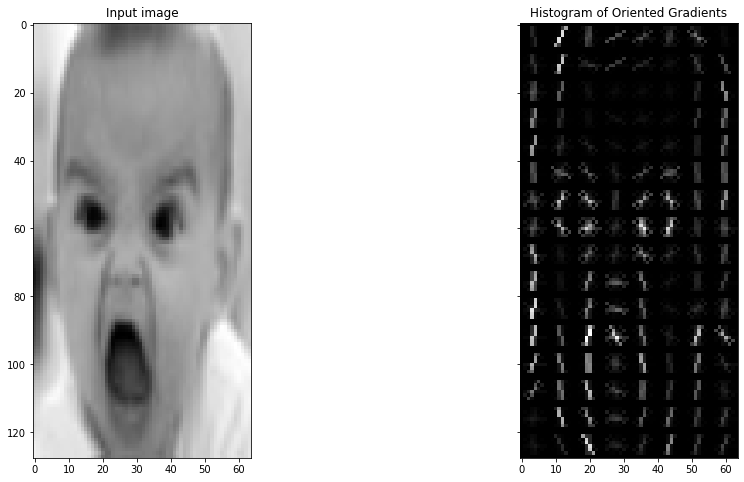

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

## Working on the fer 2013 dataset

In [1]:
import pandas as pd

In [2]:
import os
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
hog_data = pd.DataFrame()

In [30]:
hog_data['fd'] = ''
hog_data['hog_image'] = ''

In [33]:
im_df = pd.DataFrame()
im_df['image'] = ''
im_df['lable'] = ''

In [34]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [35]:
for i in emotions:
    for j in os.listdir('fer 2013/train/' + i):
        im_df= im_df.append({'image': j, 'lable': i},ignore_index=True)

In [36]:
im_df.head()

,image,lable
0,Training_10118481.jpg,angry
1,Training_10120469.jpg,angry
2,Training_10131352.jpg,angry
3,Training_10161559.jpg,angry
4,Training_1021836.jpg,angry


In [83]:
im_df.shape

(28709, 2)

In [84]:
hog_images = []
hog_features = []
lables = []

In [87]:
for i in range(0, len(im_df)):
    image = imread('fer 2013/'+'train/'+ im_df['lable'][i] + '/' + im_df['image'][i])
    fd = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, block_norm= 'L2')
    hog_images.append(hog_image)
    hog_features.append(fd)
    lables.append(im_df['lable'][i])

AttributeError: 'function' object has no attribute 'feature'

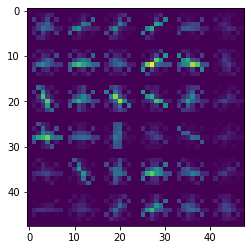

In [40]:
plt.imshow(hog_images[51])

In [43]:
dataset = pd.DataFrame()

In [54]:
# labels =  np.array(im_df['lable'].reshape(len(im_df['lable']),1))
labels =  np.array(lables)

In [55]:
lables[1]

'angry'

In [57]:
clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
#What percentage of data you want to keep for training
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [ ]:
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

In [45]:
hog_data.head()

,fd,hog_image,lable
0,"[0.1649882492325014, 0.06005869233109221, 0.13...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",angry
1,"[0.18047499678695517, 0.05400996334990955, 0.0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",angry
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",angry
3,"[0.24078322636863364, 0.2455696441010626, 0.26...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",angry
4,"[0.035101753269009946, 0.00812112049678096, 0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",angry


In [3]:
%store -r hog_data 

In [21]:
hog_train = hog_data

In [22]:
hog_train = hog_train.drop(['hog_image'], axis = 1)
hog_train.head()

,fd,lable
0,"[0.1649882492325014, 0.06005869233109221, 0.13...",angry
1,"[0.18047499678695517, 0.05400996334990955, 0.0...",angry
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",angry
3,"[0.24078322636863364, 0.2455696441010626, 0.26...",angry
4,"[0.035101753269009946, 0.00812112049678096, 0....",angry


In [75]:
X = hog_train['fd']
X = X.ravel()

In [76]:
y = np.array(hog_train['lable'], dtype= str)

In [27]:
clf = svm.SVC()
X = np.array(X)
data_frame = np.hstack((X,y))
np.random.shuffle(data_frame)

ValueError: setting an array element with a sequence.

array(['angry', 'angry', 'angry', ..., 'surprise', 'surprise', 'surprise'],
      dtype=object)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
X_train[0]

array([0.30771485, 0.30771485, 0.11810983, 0.03701704, 0.03484887,
       0.02224493, 0.02950289, 0.03248283, 0.15511827, 0.29600293,
       0.12467239, 0.30771485, 0.14393504, 0.14962234, 0.26277948,
       0.12538551, 0.04493875, 0.        , 0.24858055, 0.30771485,
       0.03748493, 0.        , 0.05356401, 0.        , 0.03879504,
       0.30771485, 0.30771485, 0.07215085, 0.04842134, 0.21040089,
       0.04990949, 0.01172311, 0.0299336 , 0.0574439 , 0.08612464,
       0.14886718, 0.26094884, 0.11689999, 0.26094884, 0.13496176,
       0.1402945 , 0.24639713, 0.11756865, 0.04213716, 0.        ,
       0.26094884, 0.04936088, 0.03808626, 0.04174914, 0.08137995,
       0.26094884, 0.26094884, 0.17119354, 0.18225467, 0.06765278,
       0.04540263, 0.19728395, 0.04679801, 0.01099226, 0.02806746,
       0.0538627 , 0.08075541, 0.13958642, 0.06689589, 0.23615   ,
       0.26094884, 0.26094884, 0.26094884, 0.17104883, 0.26094884,
       0.08602367, 0.10018834, 0.26338454, 0.04914412, 0.03791

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

# SVM

In [18]:
from sklearn import svm
import numpy as np

In [19]:
SVM_model = svm.SVC()

In [8]:
x_train = np.array(hog_train['fd'])
y_train = np.array(hog_train['lable'])

In [11]:
for i in range (0, len(x_train)):
    x_train[i] = list(x_train[i])

In [20]:
SVM_model.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [ ]:


IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

train_data_dir='fer 2013/train/'
validation_data_dir='fer 2013/test/'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

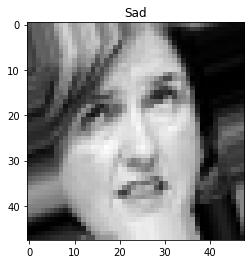

In [17]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()